In [186]:
import numpy as np
import matplotlib.pyplot as plt
import PIPS
import scipy
import time
import re
PIPS.__version__

'0.3.0-alpha.4'

In [187]:
class varstar:
    def __init__(self,name,star_type):
        self.name = name
        self.star_type = star_type
        self.notes = ''
        
        self.time = []
        self.dtime = []
        'length of time over which data was taken'
        self.p = []
        self.p_err = []
        self.B_amp = []
        self.V_amp = []
        self.B_mag = []
        self.V_mag = []
        self.B_int = []
        self.V_int = []
        self.F_params = []
        
        self.varlist = [self.time, self.dtime, self.p, self.p_err, self.B_amp, self.V_amp, self.B_mag, self.V_mag, self.B_int, self.V_int, self.F_params]
        
    def add_note(self,note):
        self.notes = self.notes + note
    def add_data(self,time=None,dtime=None,p=None,p_err=None,B_amp=None,V_amp=None,B_mag=None,V_mag=None,B_int=None,V_int=None,F_params=None,Overwrite=True): 
        entered = False
        cur_entry = [time,dtime,p,p_err,B_amp,V_amp,B_mag,V_mag,B_int,V_int,F_params]
        
        if dtime:
            time_window = dtime/2
        else:
            time_window = 180
        
        for i in range(len(self.time)):
            if abs(float(time)-float(self.time[i]))<=time_window:
                for j in range(len(self.varlist)):
                    if cur_entry[j]:
                        if Overwrite or (self.varlist[j][i] == None):
                            self.varlist[j][i] = cur_entry[j]
                entered = True
                break
        if not entered:
            for i in range(len(self.varlist)):
                self.varlist[i].append(cur_entry[i])
star_names = []

In [188]:
Corwin_2001_table1 = '''V1 . . . . . . . 0.5206250 0.5205959 [0.0000291 2,449,090.496 [0.440 RRab
V3 . . . . . . . 0.5582053 0.558200 [0.0000053 2,449,090.391 . . . RRab, Blazhko
V5 . . . . . . . 0.506065 0.504178 [0.0018870 2,449,090.351 . . . RRab, Blazhko
V6 . . . . . . . 0.5143228 0.5143332 0.0000104 2,449,090.384 0.157 RRab
V7 . . . . . . . 0.496775 0.497429 0.0006540 2,449,090.406 . . . RRab, Blazhko
V8 . . . . . . . . . . 0.63916 : : . . . 2,449,090.435 . . . RRab
V9 . . . . . . . 0.5415641 0.5415528 [0.0000113 2,449,090.152 [0.187 RRab
V10 . . . . . . 0.5695185 0.5695439 0.0000254 2,449,090.330 0.385 RRab
V11 . . . . . . 0.5078918 0.507894 0.0000022 2,449,090.002 . . . RRab
V12 . . . . . . 0.317890 0.317540 [0.0003500 2,449,090.264 . . . RRc
V13 . . . . . . 0.4830302 0.482938 : : [0.0000922 2,449,090.083 . . . RRab
V14 . . . . . . 0.6359019 0.635903 0.0000011 2,449,090.206 . . . RRab, Blazhko
V15 . . . . . . 0.5300794 0.5300874 0.0000080 2,449,090.186 0.121 RRab
V16 . . . . . . 0.5115075 0.5114943 [0.0000132 2,449,090.165 [0.200 RRab
V17 . . . . . . 0.5761417 0.5761594 0.0000177 2,449,090.285 0.268 RRab, Blazhko
V18 . . . . . . 0.5163623 0.516451 0.0000887 2,449,090.343 . . . RRab, Blazhko
V19 . . . . . . 0.6319796 0.631972 [0.0000076 2,449,090.107 . . . RRab
V20 . . . . . . 0.491260 0.490476 [0.0007840 2,449,090.006 . . . RRab, Blazhko
V21 . . . . . . 0.5157336 0.5157556 0.0000220 2,449,090.195 0.334 RRab
V22 . . . . . . 0.4814208 0.481424 0.0000032 2,449,090.250 . . . RRab
V23 . . . . . . 0.5953756 0.5953756 0.0000000 2,449,090.267 . . . RRab, Blazhko
V24 . . . . . . 0.6633494 0.6633722 0.0000228 2,449,090.029 . . . RRab, Blazhko
V25 . . . . . . 0.4800510 0.480062 0.0000110 2,449,090.018 0.166 RRab
V26 . . . . . . 0.5977452 0.5977405 [0.0000047 2,449,090.267 [0.0718 RRab
V27 . . . . . . 0.5790912 0.579073 [0.0000182 2,449,090.309 . . . RRab
V28 . . . . . . 0.470120 0.469909 [0.0002110 2,449,090.454 . . . RRab, Blazhko
V29 . . . . . . . . . 0.331684 . . . 2,449,090.209 . . . RRc
V30 . . . . . . 0.5120902 0.512092 0.0000018 2,449,090.195 . . . RRab
V31 . . . . . . 0.5807216 0.5807196 [0.0000020 2,449,090.088 . . . RRab
V32 . . . . . . 0.4953518 0.49535 [0.0000018 2,449,090.376 . . . RRab
V33 . . . . . . 0.5252237 0.5252355 0.0000118 2,449,090.513 . . . RRab, Blazhko
V34 . . . . . . 0.5591012 0.560963 0.0018618 2,449,090.001 . . . RRab, Blazhko
V35 . . . . . . 0.5306059 0.530557 [0.0000489 2,449,090.067 . . . RRab, Blazhko
V36 . . . . . . 0.5455855 0.5455989 0.0000134 2,449,090.054 0.203 RRab
V37 . . . . . . 0.326640 0.3266387 [0.0000013 2,449,090.307 [0.0192 RRc
V38 . . . . . . 0.558030 0.5580110 [0.0000190 2,449,090.337 [0.288 RRab, Blazhko
V39 . . . . . . 0.5870766 0.587067 [0.0000096 2,449,090.338 . . . RRab, Blazhko
V40 . . . . . . 0.5515416 0.551535 [0.0000066 2,449,090.294 . . . RRab
V41 . . . . . . 0.4850462 0.486631 : : 0.0015848 2,449,090.291 . . . RRab, Blazhko
V42 . . . . . . 0.5901852 0.5900984 [0.0000868 2,449,090.262 [1.31 RRab
V43 . . . . . . 0.5405790 0.540510 [0.0000690 2,449,090.343 . . . RRab, Blazhko
V44 . . . . . . 0.506295 0.506354 : : 0.0000590 2,449,090.070 . . . RRab, Blazhko
V45 . . . . . . 0.536905 0.536073 [0.0008320 2,449,090.217 . . . RRab, Blazhko
V46 . . . . . . 0.6133669 0.6133832 0.0000163 2,449,090.180 0.246 RRab
V47 . . . . . . 0.5409923 0.540896 [0.0000963 2,449,090.164 . . . RRab, Blazhko
V48 . . . . . . 0.6278128 0.6278299 0.0000171 2,449,090.287 0.393 RRab
V49 . . . . . . 0.5482196 0.5482088 [0.0000108 2,449,090.185 [0.163 RRab, Blazhko
V50 . . . . . . 0.513645 0.513170 [0.0004750 2,449,090.438 . . . RRab, Blazhko
V51 . . . . . . 0.5839818 0.5839702 [0.0000116 2,449,090.205 [0.176 RRab
V52 . . . . . . 0.5162250 0.516236 0.0000110 2,449,090.015 . . . RRab, Blazhko
V53 . . . . . . 0.5048878 0.5048815 [0.0000063 2,449,090.216 [0.0953 RRab
V54 . . . . . . 0.5063150 0.506247 [0.0000680 2,449,090.244 . . . RRab
V55 . . . . . . 0.5298136 0.5298217 0.0000081 2,449,090.417 0.122 RRab
V56 . . . . . . 0.329600 0.329600 0.0000000 2,449,090.040 . . . RRc
V57 . . . . . . 0.5122223 0.5121908 [0.0000315 2,449,090.461 [0.477 RRab
V58 . . . . . . 0.5170617 0.517054 [0.0000077 2,449,090.009 . . . RRab
V59 . . . . . . 0.5888053 0.5888259 0.0000206 2,449,090.532 0.313 RRab, Blazhko
V60 . . . . . . 0.7077228 0.7077271 0.0000043 2,449,090.520 0.0656 RRab
V61 . . . . . . 0.5209312 0.520926 [0.0000052 2,449,090.377 . . . RRab, Blazhko
V62 . . . . . . 0.6524077 0.6524179 0.0000102 2,449,090.159 0.155 RRab, Blazhko
V63 . . . . . . 0.5704164 0.570382 [0.0000344 2,449,090.102 . . . RRab, Blazhko
V64 . . . . . . 0.6054590 0.605465 0.0000060 2,449,090.498 . . . RRab
V65 . . . . . . 0.6683394 0.668347 0.0000076 2,449,090.207 . . . RRab
V66 . . . . . . 0.6201827 0.619100 [0.0010827 2,449,090.043 . . . RRab, Blazhko
V100 ...... 0.6188126 0.6188126 0.0000000 2,449,090.503 . . . RRab
V101 ...... 0.6438975 0.643886 [0.0000115 2,449,090.215 . . . RRab, Blazhko
V104 ...... 0.5699231 0.5699305 0.0000074 2,449,090.151 . . . RRab
V105 ...... 0.287740 0.287744 0.0000040 2,449,090.219 . . . RRc
V106 ...... 0.5471593 0.5471228 [0.0000365 2,449,090.396 [0.271 RRab Blazhko
V107 ...... 0.3090348 0.309035 0.0000010 2,449,090.117 . . . RRc
V108 ...... 0.5196047 0.5196153 0.0000106 2,449,090.137 0.0791 RRab
V109 ...... 0.5339239 0.5339163 [0.0000076 2,449,090.116 [0.0564 RRab
V110 ...... 0.5353569 0.535454 0.0000971 2,449,090.001 . . . RRab, Blazhko
V111 ...... 0.5102469 0.510189 [0.0000579 2,449,090.144 . . . RRab, Blazhko
V114 ...... 0.5977270 0.5977230 [0.0000040 2,449,090.143 . . . RRab
V115 ...... 0.5133529 0.513349 : : [0.0000039 2,449,090.394 . . . RRab
V116 ...... 0.5148088 0.514815 0.0000062 2,449,090.005 . . . RRab
V117 ...... 0.6005164 0.597263 [0.0032534 2,449,090.219 . . . RRab, Blazhko
V118 ...... 0.4993807 0.499391 0.0000103 2,449,090.175 . . . RRab
V119 ...... 0.5177411 0.517692 [0.0000491 2,449,090.188 . . . RRab
V120 ...... 0.6401387 0.6401387 0.0000000 2,449,090.089 . . . RRab
V121 ...... 0.5351882 0.535211 0.0000228 2,449,090.361 . . . RRab, Blazhko
V122 ...... 0.5017 0.506026 : : 0.0043260 2,449,090.486 . . . RRab
V124 ...... 0.7524328 0.752436 0.0000032 2,449,090.054 . . . RRab
V125 ...... 0.349820 0.349823 0.0000030 2,449,090.094 . . . RRc
V126 ...... 0.348405 0.348410 0.0000050 2,449,090.334 . . . RRc
V128 ...... 0.292042 0.292040 [0.0000020 2,449,090.053 . . . RRc
V129 ...... 0.305474 0.406102 0.1006280 2,449,090.026 . . . RRc
V130 ...... 0.5688172 0.567840 [0.0009772 2,449,090.037 . . . RRab, Blazhko
V131 ...... 0.297692 0.297691 [0.0000010 2,449,090.073 . . . RRc
V132 ...... 0.339825 0.339851 0.0000260 2,449,090.096 . . . RRc
V133 ...... 0.5507230 0.5507177 [0.0000053 2,449,090.229 . . . RRab
V134 ...... 0.6190 0.618057 [0.0009430 2,449,090.067 . . . RRab
V135 ...... 0.56843 0.5683966 [0.0000334 2,449,090.007 . . . RRab
V136 ...... ... 0.617186 : : . . . 2,449,090.159 . . . RRab
V137 ...... 0.5751464 0.575161 0.0000146 2,449,090.443 . . . RRab
V139 ...... 0.560004 0.55997 : : [0.0000340 2,449,090.311 . . . RRab
V140 ...... 0.333130 0.333499 : : 0.0003690 2,449,090.062 . . . RRc
V142 ...... 0.5686256 0.568628 0.0000024 2,449,090.474 . . . RRab
V143 ........ 0.51111 0.596535 0.0854250 2,449,090.063 . . . RRab, Blazhko
V144 ........ 0.5967843 0.5967843 0.0000000 2,449,090.492 . . . RRab
V145 ........ 0.514456 0.514456 : : 0.0000000 2,449,090.306 . . . RRab
V146 ........ 0.502193 0.596745 0.0945520 2,449,090.033 . . . RRab
V147 ........ 0.346785 0.346479 [0.0003060 2,449,090.071 . . . RRc
V148 ........ 0.46720 0.465967 : : [0.0012330 2,449,090.285 . . . RRab
V149 ........ 0.54985 0.549959 : : 0.0001090 2,449,090.271 . . . RRab
V150 ........ 0.52397 0.523919 [0.0000510 2,449,090.430 . . . RRab, Blazhko
V151 ........ 0.51705 0.517767 : : 0.0007170 2,449,090.506 . . . RRab, Blazhko
V152 ........ 0.326115 0.326135 0.0000200 2,449,090.117 . . . RRc
V155 ........ ... 0.47114 : : . . . 2,449,090.242 . . . RRab, Blazhko
V156 ........ 0.531979 0.531987 0.0000080 2,449,090.057 . . . RRab
V157 ........ 0.5283 0.541872 : : 0.0135720 2,449,090.287 . . . RRab
V159 ........ 0.5337 0.5337 : : 0.0000000 2,449,090.062 . . . RRab
V160 ........ 0.64792 0.657324 : : 0.0094040 2,449,090.578 . . . RRab, Blazhko
V161 ........ 0.49878 0.514435 : : 0.0156550 2,449,090.303 . . . RRab
V164 ........ ... 0.509594 : : . . . 2,449,090.429 . . . RRab
V165 ........ 0.4833 0.485038 : : 0.0017380 2,449,090.080 . . . RRab
V166 ........ 0.32727 0.357159 : : 0.0298890 2,449,090.033 . . . RRd
V167 ........ 0.6439839 0.643973 [0.0000109 2,449,090.284 . . . RRab
V168 ........ 0.273455 0.27643 : : 0.0029750 2,449,090.129 . . . RRc
V170 ........ 0.43771 0.435694 [0.0020160 2,449,090.094 . . . RRc
V171 ........ 0.43032 0.303828 : : [0.1264920 2,449,090.281 . . . RRc
V172 ........ 0.59400 0.542288 [0.0517120 2,449,090.162 . . . RRab
V173 ........ 0.606990 0.607016 : : 0.0000260 2,449,090.019 . . . RRab
V174 ........ 0.3996 0.5945 : : 0.1949000 2,449,090.221 . . . RRab
V175 ........ 0.60780 0.565839 : : [0.0419610 2,449,090.219 . . . RRab
V176 ........ 0.55599 0.540593 : : [0.0153970 2,449,090.301 . . . RRab, Blazhko
V177 ........ 0.34836 0.348749 0.0003890 2,449,090.253 . . . RRc
V178 ........ 0.26498 0.267387 0.0024070 2,449,090.058 . . . RRc
V184 ........ 0.517 0.52958 : : 0.0125800 2,449,090.501 . . . RRab
V186 ........ 0.675 0.663267 : : [0.0117330 2,449,090.624 . . . RRab
V187 ........ 0.2956 0.584126 : : 0.2885260 2,449,090.421 . . . RRab
V188 ........ 0.2706 0.266288 : : [0.0043120 2,449,090.017 . . . RRc
V189 ........ 0.668 0.61869 : : [0.0493100 2,449,090.240 . . . RRab
V190 ........ 0.501 0.522803 : : 0.0218030 2,449,090.398 . . . RRab
V191 ........ 0.512 0.519206 : : 0.0072060 2,449,090.356 . . . RRab
V192 ........ 0.525 0.48145 : : [0.0435500 2,449,090.225 . . . RRab
V193 ........ 0.630 0.732845 : : 0.1028450 2,449,090.327 . . . RRab
V194 ........ 0.549 0.4892 : : [0.0598000 2,449,090.461 . . . RRab
V195 ........ 0.600 0.64394 : : 0.0439400 2,449,090.495 . . . RRab
V197 ........ 0.5000075 0.499904 [0.0001035 2,449,090.207 . . . RRab
V198 ........ 0.2797 0.283046 : : 0.0033460 2,449,090.077 . . . RRc
V199 ........ 0.488 0.40891 : : [0.0790900 . . . . . . RRc
V201 ........ 0.541333 0.53963 : : [0.0017030 2,449,090.133 . . . RRab
V202 ........ 0.9987 0.773562 [0.2251380 2,449,090.305 . . . RRab
V203 ........ 0.28719 0.289794 0.0026040 2,449,090.223 . . . RRc
V207 ........ ... 0.344941 : : . . . 2,449,090.196 . . . RRc
V208 ........ ... 0.337347 : : . . . 2,449,090.026 . . . RRc
V209 ........ ... 0.347184 : : . . . 2,449,090.295 . . . RRc
V211 ........ 0.557798 0.558197 : : 0.0003990 2,449,090.420 . . . RRab
V212 ........ 0.542196 0.542196 : : 0.0000000 2,449,090.461 . . . RRab, Blazhko
V213 ........ ... 0.299706 : : . . . 2,449,090.016 . . . RRc
V214 ........ 0.539493 0.539493 : : 0.0000000 2,449,090.344 . . . RRab, Blazhko
V215 ........ ... 0.533078 : : . . . 2,449,090.385 . . . RRab
V216 ........ ... 0.346484 : : . . . 2,449,090.344 . . . RRc
V218 ........ 0.543774 0.543079 : : [0.0006950 2,449,090.196 . . . RRab
V219 ........ ... 0.611394 : : . . . 2,449,090.042 . . . RRab
V220 ........ ... 0.59585 : : . . . 2,449,090.149 . . . RRab
V221 ........ ... 0.378752 : : . . . 2,449,090.125 . . . RRc
V222 ........ 0.596764 0.50065 : : [0.0961140 2,449,090.499 . . . RRab
V223 ........ ... 0.329586 : : . . . 2,449,090.188 . . . RRc
V226 ........ 0.4884295 0.487692 : : [0.0007375 2,449,090.431 . . . RRab
V235 ........ ... 0.761746 : : . . . 2,449,090.706 . . . RRab'''

Corwin_2001_table2 = '''V1 . . . . . . . 1.48 1.15 15.974 15.869 15.651 15.591 0.323
V3 . . . . . . . 1.54 1.22 15.920 15.806 15.612 15.545 0.308 Blazhko
V5 . . . . . . . 1.13 0.88 15.934 15.867 15.629 15.592 0.305 Blazhko
V6 . . . . . . . 1.51 1.20 16.068 15.971 15.744 15.686 0.324
V7 . . . . . . . 1.55 1.28 16.050 15.944 15.751 15.688 0.299 Blazhko
V8 . . . . . . . 0.83 0.77 15.634 15.612 15.146 15.137 0.488 Blend
V9 . . . . . . . 1.38 1.06 15.999 15.918 15.674 15.630 0.325
V10 . . . . . . 1.09 0.89 16.009 15.955 15.645 15.615 0.364
V11 . . . . . . 1.59 1.30 15.947 15.817 15.659 15.580 0.288
V12 . . . . . . 0.70 0.57 15.792 15.765 15.574 15.557 0.218
V13 . . . . . . 1.03 0.86 15.913 15.882 15.629 15.612 0.284
V14 . . . . . . 1.36 1.08 15.904 15.828 15.550 15.506 0.354 Blazhko
V15 . . . . . . 1.37 1.11 15.982 15.893 15.648 15.597 0.334
V16 . . . . . . 1.44 1.15 16.048 15.953 15.733 15.676 0.315
V17 . . . . . . 1.39 1.11 16.012 15.937 15.663 15.620 0.349 Blazhko
V18 . . . . . . 1.41 1.18 16.057 15.966 15.725 15.673 0.332 Blazhko
V19 . . . . . . 0.62 0.49 16.078 16.061 15.688 15.679 0.390
V20 . . . . . . 1.30 1.04 15.940 15.862 15.655 15.611 0.285 Blazhko
V21 . . . . . . 1.37 1.12 16.058 15.967 15.709 15.656 0.349
V22 . . . . . . 1.38 1.08 16.001 15.904 15.711 15.654 0.290
V23 . . . . . . 1.11 0.86 15.985 15.954 15.637 15.621 0.348 Blazhko
V24 . . . . . . 1.10 0.87 15.892 15.855 15.520 15.499 0.372 Blazhko
V25 . . . . . . 1.64 1.28 16.030 15.905 15.712 15.642 0.318
V26 . . . . . . 1.26 1.03 15.918 15.849 15.580 15.539 0.338
V27 . . . . . . 1.19 0.95 15.998 15.938 15.643 15.610 0.355
V28 . . . . . . 1.26 1.09 15.958 15.914 15.675 15.651 0.283 Blazhko
V29 . . . . . . 0.62 0.50 15.731 15.712 15.495 15.484 0.236
V30 . . . . . . 1.45 1.24 15.985 15.889 15.628 15.571 0.357
V31 . . . . . . 1.57 1.25 15.928 15.827 15.583 15.527 0.345
V32 . . . . . . 1.44 1.23 15.930 15.828 15.615 15.558 0.315
V33 . . . . . . 1.55 1.25 16.016 15.915 15.673 15.614 0.343 Blazhko
V34 . . . . . . 1.30 1.05 16.014 15.962 15.668 15.638 0.346 Blazhko
V35 . . . . . . 1.75 1.37 15.966 15.832 15.649 15.570 0.317 Blazhko
V36 . . . . . . 1.46 1.17 16.005 15.911 15.672 15.618 0.333
V37 . . . . . . 0.68 0.51 15.896 15.873 15.651 15.637 0.245
V38 . . . . . . 1.38 1.08 16.023 16.032 15.680 15.628 0.343 Blazhko
V39 . . . . . . 1.20 0.89 16.061 16.029 15.692 15.674 0.369 Blazhko
V40 . . . . . . 1.29 1.02 16.077 16.006 15.721 15.680 0.356
V41 . . . . . . 1.14 0.87 16.049 15.993 15.764 15.728 0.285 Blazhko
V42 . . . . . . 1.63 1.36 15.871 15.744 15.557 15.476 0.314
V43 . . . . . . 1.45 1.29 16.042 15.941 15.713 15.651 0.329 Blazhko
V44 . . . . . . 0.92 0.75 15.929 15.917 15.628 15.620 0.301 Blazhko
V45 . . . . . . 1.46 1.17 16.037 15.945 15.706 15.649 0.331 Blazhko
V46 . . . . . . 0.77 0.64 16.072 16.046 15.684 15.668 0.388
V47 . . . . . . 1.07 0.85 16.001 15.980 15.679 15.666 0.322 Blazhko
V48 . . . . . . 0.81 0.66 15.904 15.872 15.513 15.494 0.391
V49 . . . . . . 1.22 0.95 16.046 16.023 15.690 15.677 0.356 Blazhko
V50 . . . . . . 1.55 1.20 15.982 15.863 15.665 15.595 0.317 Blazhko
V51 . . . . . . 1.12 0.86 16.020 15.970 15.650 15.621 0.370
V52 . . . . . . 1.18 1.01 16.046 16.023 15.719 15.705 0.327 Blazhko
V53 . . . . . . 1.54 1.20 16.042 15.931 15.704 15.638 0.338
V54 . . . . . . 0.97 0.74 16.036 15.993 15.714 15.691 0.322
V55 . . . . . . 1.41 1.08 16.042 15.955 15.717 15.666 0.325
V56 . . . . . . 0.65 0.50 15.872 15.849 15.629 15.614 0.243
V57 . . . . . . 1.52 1.15 16.072 15.975 15.732 15.676 0.340
V58 . . . . . . 1.53 1.28 15.914 15.804 15.574 15.509 0.340
V59 . . . . . . 1.01 0.79 16.033 15.987 15.672 15.646 0.361 Blazhko
V60 . . . . . . 0.91 0.75 15.909 15.873 15.540 15.520 0.369
V61 . . . . . . 1.29 1.03 16.015 15.932 15.692 15.641 0.323 Blazhko
V62 . . . . . . 0.80 0.58 16.024 15.998 15.635 15.620 0.389 Blazhko
V63 . . . . . . 1.00 0.79 16.039 15.998 15.684 15.661 0.355 Blazhko
V64 . . . . . . 0.99 0.75 16.065 16.027 15.685 15.664 0.380
V65 . . . . . . 1.24 0.97 15.894 15.831 15.533 15.496 0.361
V66 . . . . . . 0.96 0.80 16.008 15.966 15.631 15.607 0.377 Blazhko
V67 . . . . . . . 1.50 1.17 16.036 15.968 15.705 15.657 0.331 Blazhko
V68 . . . . . . . 1.02 0.86 15.957 15.930 15.657 15.642 0.300 RRd
V69 . . . . . . . 1.17 0.99 16.066 16.007 15.706 15.673 0.360
V70 . . . . . . . 0.51 0.40 15.636 15.623 15.357 15.350 0.279
V71 . . . . . . . 1.05 0.80 16.064 16.012 15.692 15.659 0.372
V72 . . . . . . . 1.66 1.30 16.056 15.926 15.758 15.679 0.298
V73 . . . . . . . 0.36 0.29 16.028 16.022 15.627 15.623 0.401
V74 . . . . . . . 1.50 1.30 16.032 15.918 15.722 15.653 0.310
V75 . . . . . . . 0.63 0.54 15.882 15.858 15.642 15.626 0.240
V76 . . . . . . . 1.56 1.38 16.098 15.985 15.789 15.719 0.309
V77 . . . . . . . 1.61 1.30 16.090 15.948 15.811 15.725 0.279
V78 . . . . . . . 1.16 0.86 15.961 15.939 15.569 15.554 0.392 Blazhko
V79 . . . . . . . 0.79 0.66 15.949 15.936 15.665 15.658 0.284 RRd
V80 . . . . . . . 0.83 0.61 15.999 15.974 15.661 15.646 0.338 Blazhko
V81 . . . . . . . 1.44 1.10 16.047 15.960 15.706 15.656 0.341
V82 . . . . . . . 1.45 1.21 16.034 15.942 15.704 15.601 0.330
V83 . . . . . . . 1.50 1.20 16.010 15.906 15.712 15.651 0.298
V84 . . . . . . . 0.96 0.72 16.035 15.996 15.652 15.630 0.383
V85 . . . . . . . 0.67 0.52 15.737 15.712 15.498 15.483 0.239
V86 . . . . . . . 0.73 0.57 15.885 15.857 15.654 15.637 0.231
V87 . . . . . . . 0.87 0.71 15.871 15.852 15.590 15.578 0.281 RRd
V88 . . . . . . . 0.68 0.58 15.941 15.893 15.739 15.714 0.202
V89 . . . . . . . 1.36 1.13 15.989 15.912 15.625 15.579 0.364
V90 . . . . . . . 1.45 1.17 16.025 15.928 15.696 15.639 0.329
V91 . . . . . . . 1.47 1.24 15.996 15.894 15.678 15.616 0.318 Blazhko
V92 . . . . . . . 1.44 1.14 16.003 15.901 15.690 15.632 0.313
V93 . . . . . . . 0.95 0.76 16.022 15.984 15.662 15.640 0.360
V94 . . . . . . . 1.45 1.18 16.047 15.954 15.731 15.677 0.316
V96 . . . . . . . 1.54 1.21 . . . . . . . . . . . . . . .
V97 . . . . . . . 0.57 0.45 15.923 15.906 15.661 15.651 0.262
V99 . . . . . . . 1.01 0.77 15.910 15.878 15.622 15.602 0.288 RRd
V100 ...... 0.82 0.67 16.073 16.045 15.695 15.681 0.378
V101 ...... 0.83 0.68 16.090 16.059 15.716 15.696 0.374 Blazhko
V102 ...... ... ... 16.128 16.128 15.642 15.641 0.486 Not variable
V104 ...... 1.58 1.25 15.934 15.823 15.601 15.536 0.333
V105 ...... 0.44 0.35 15.741 15.730 15.539 15.532 0.202
V106 ...... 1.23 0.92 16.032 15.994 15.691 15.668 0.341 Blazhko
V107 ...... 0.74 0.59 15.889 15.861 15.649 15.631 0.240
V108 ...... 1.47 1.14 16.067 15.973 15.745 15.692 0.322
V109 ...... 1.48 1.23 16.075 15.982 15.726 15.673 0.349
V110 ...... 1.44 1.15 16.009 15.958 15.656 15.626 0.353 Blazhko
V111 ...... 1.29 1.14 16.059 16.011 15.736 15.713 0.323 Blazhko
V114 ...... 1.27 1.16 16.095 16.039 15.716 15.686 0.379
V115 ...... 1.40 1.20 16.155 16.058 15.779 15.717 0.376
V116 ...... 1.75 1.43 16.090 15.998 15.742 15.685 0.348
V117 ...... 1.26 1.00 15.960 15.905 15.620 15.591 0.340 Blazhko
V118 ...... 1.45 1.13 . . . . . . . . . . . . . . .
V119 ...... 1.48 1.16 16.004 15.904 15.668 15.606 0.336
V120 ...... 0.65 0.51 16.077 16.060 15.685 15.676 0.392
V121 ...... 1.19 1.00 16.088 16.045 15.769 15.744 0.319 Blazhko
V122 ...... 1.50 1.10 15.171 15.101 15.030 15.012 0.141 Blend
V124 ...... 0.51 0.37 15.941 15.931 15.542 15.536 0.399
V125 ...... 0.58 0.47 15.894 15.877 15.621 15.611 0.273
V126 ...... 0.58 0.46 15.885 15.868 15.620 15.609 0.265
V128 ...... 0.73 0.63 15.855 15.827 15.639 15.620 0.216
V129 ...... 0.55 0.47 15.783 15.766 15.493 15.481 0.290
V130 ...... 1.12 0.80 15.965 15.934 15.592 15.574 0.373 Blazhko
V131 ...... 0.69 0.59 15.896 15.867 15.668 15.648 0.228
V132 ...... 0.66 0.54 15.883 15.865 15.601 15.589 0.282
V133 ...... 1.33 1.16 16.056 15.974 15.736 15.693 0.320
V134 ...... 0.85 0.64 16.097 16.067 15.764 15.745 0.333
V135 ...... 1.13 0.86 16.069 16.023 15.687 15.663 0.382
V136 ...... ... ... 15.829 15.802 15.375 15.357 0.454 Blend
V137 ...... 1.18 0.93 15.981 15.924 15.613 15.579 0.368
V139 ...... 1.61 1.45 . . . . . . . . . . . . . . .
V140 ...... 0.59 0.45 15.725 15.699 15.493 15.477 0.232
V142 ...... 1.35 0.97 16.096 16.029 15.742 15.703 0.354
V143 ...... 1.23 0.99 15.865 15.807 15.510 15.472 0.355 Blazhko
V144 ...... 0.72 0.56 15.987 15.959 15.597 15.582 0.390
V145 ...... ... ... 15.690 15.633 15.271 15.234 0.419 Blend
V146 ...... 1.03 0.85 15.959 15.909 15.581 15.552 0.378
V147 ...... 0.57 0.42 16.024 16.000 15.771 15.753 0.253
V148 ...... ... ... 15.652 15.573 15.198 15.149 0.454 Blend
V149 ...... 1.42 1.14 16.072 15.975 15.744 15.687 0.328
V150 ...... 1.45 1.15 16.030 15.940 15.705 15.651 0.325 Blazhko
V151 ...... 1.56 1.33 16.091 15.987 15.777 15.685 0.314 Blazhko
V152 ...... 0.59 0.50 15.720 15.697 15.511 15.496 0.209
V155 ...... 1.45 1.22 15.971 15.878 15.689 15.622 0.282 Blazhko
V156 ...... 1.55 1.20 16.093 15.997 15.768 15.694 0.325
V158 ...... ... ... ... ... ... ... ... Nonvariable ?
V160 ...... 1.44 1.14 16.082 16.016 15.734 15.695 0.348 Blazhko
V164 ...... 1.85 1.65 16.208 16.091 16.014 15.926 0.194
V166 ...... 1.16 0.90 16.006 15.989 15.711 15.700 0.295 RRd
V167 ...... 0.62 0.48 16.020 16.003 15.638 15.629 0.382
V168 ...... 0.50 0.40 . . . . . . . . . . . . . . .
V170 ...... 0.55 0.45 15.546 15.527 15.303 15.291 0.243
V171 ...... 0.90 0.70 15.834 15.804 15.605 15.581 0.229
V172 ...... 1.45 1.20 16.161 16.076 15.795 15.742 0.366
V173 ...... ... ... 15.126 15.110 14.792 14.753 0.334 Blend
V174 ...... 1.00 0.80 16.340 16.310 15.999 15.985 0.341
V176 ...... 1.01 0.74 16.139 16.121 15.846 15.840 0.293 Blazhko
V177 ...... 0.74 0.59 15.771 15.742 15.585 15.567 0.186
V178 ...... 0.43 0.37 15.883 15.871 15.713 15.706 0.170
V184 ...... 1.65 1.30 16.186 16.079 15.844 15.779 0.342
V186 ...... 0.68 0.55 15.940 15.922 15.550 15.538 0.390
V187 ...... ... ... 15.566 15.516 14.876 14.850 0.690 Blend
V188 ...... 0.45 0.40 . . . . . . . . . . . . . . .
V189 ...... ... ... 15.698 15.667 15.206 15.192 0.492 Blend
V190 ...... 1.80 1.30 16.142 16.037 15.775 15.726 0.367
V191 ...... ... ... 15.417 15.379 15.271 15.243 0.146 Blend
V192 ...... ... ... 14.953 14.935 14.399 14.387 0.554 Blend
V193 ...... 1.60 1.20 15.935 15.795 15.568 15.490 0.367
V194 ...... ... ... 15.262 15.208 14.651 14.612 0.611 Blend
V195 ...... 0.70 0.50 . . . . . . . . . . . . . . . Nonvariable ?
V196 ...... ... ... ... ... ... ... ... Nonvariable ?
V197 ...... 1.68 1.38 16.145 15.996 15.782 15.704 0.363
V198 ...... 0.80 0.60 15.691 15.667 15.437 15.425 0.254
V201 ...... 1.60 1.30 16.123 16.030 15.837 15.770 0.286
V202 ...... 0.21 0.18 15.926 15.923 15.526 15.524 0.400
V203 ...... 0.19 0.15 15.735 15.732 15.547 15.546 0.188
V204 ...... ... ... 16.490 . . . 15.693 . . . 0.797 Nonvariable ?
V207 ...... 0.50 0.40 15.744 15.729 15.467 15.455 0.277
V208 ...... 0.60 0.40 15.776 15.760 15.486 15.475 0.290
V209 ...... 0.35 0.30 15.142 15.135 14.985 14.979 0.157 Blend
V210 ...... ... ... ... ... ... ... ... Nonvariable ?
V211 ...... ... ... 15.442 15.404 14.863 14.848 0.579 Blend
V212 ...... 1.48 1.30 16.141 16.041 15.867 15.803 0.274 Blazhko
V213 ...... 0.80 0.50 15.787 15.747 15.552 15.533 0.235
V214 ...... ... ... ... ... ... ... ... Blazhko
V215 ...... 1.40 1.20 16.021 15.913 15.720 15.617 0.301
V216 ...... 0.77 0.60 16.043 16.020 15.847 15.833 0.196
V218 ...... 1.65 1.20 16.157 16.090 15.876 15.828 0.281
V219 ...... 0.80 0.70 16.085 16.057 15.715 15.700 0.370
V220 ...... ... ... 14.879 14.871 14.077 14.074 0.802 Blend
V221 ...... ... ... 15.566 15.544 15.330 15.316 0.236 Blend
V222 ...... 1.83 1.31 16.086 15.954 15.774 15.704 0.312
V223 ...... 0.90 0.70 . . . . . . . . . . . . . . .
V226 ...... 1.55 . . . . . . . . . . . . . . . . . .
V227 ...... ... ... ... ... ... ... ... Nonvariable ?
V228 ...... ... ... 16.063 16.062 15.671 15.670 0.392 Nonvariable ?
V231 ...... ... ... 15.978 . . . 15.974 . . . 0.004 Nonvariable ?
V232 ...... ... ... 15.911 . . . 15.902 . . . 0.009 Nonvariable ?
V233 ........ ... ... ... ... ... ... ... Nonvariable ?
V234 ........ ... ... 15.788 . . . 15.699 . . . 0.089 Nonvariable ?
V235 ........ 0.70 0.60 15.882 15.859 15.483 15.467 0.399'''


pattern = r'(V[\d]+).*(RR[a-z]+[, Blazhko]*)'

tuplelist = re.findall(pattern,Corwin_2001_table1)

star = {}
for name, star_type in tuplelist:
    type_list = star_type.split(', ')
    star_names.append(name)
    star[name] = varstar(name,type_list[0])
    if len(type_list) > 1:
        star[name].add_note('Blazhko')

p_and_epoch = r'(V[\d]+)[\. ]((\. \. \.)|(\.\.\.)|(0\.[\d]+)).*(0\.[\d]+).*((\. \. \.)|(0\.[\d]+)).*(2,449,090\.[\d]+)'

amp_and_mag = r'(V[\d]+).*( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))( ((\. \. \.)|(\.\.\.)|([\d]+\.[\d]+)))'

p_and_epoch_list = re.findall(p_and_epoch,Corwin_2001_table1)
amp_and_mag_list = re.findall(amp_and_mag,Corwin_2001_table2)

combo_list = []
for row in p_and_epoch_list:
    name = row[0]
    p = row[5]
    epoch = row[9].replace(',','')
    for entry in amp_and_mag_list:
        if entry[0] == name:
            B_amp = entry[5] if entry[5] else None
            V_amp = entry[10] if entry[10] else None
            B_mag = entry[15] if entry[15] else None
            V_mag = entry[25] if entry[25] else None
            B_int = entry[20] if entry[20] else None
            V_int = entry[30] if entry[30] else None
            break
    star[name].add_data(time=epoch,p=p,B_amp=B_amp,V_amp=V_amp,B_mag=B_mag,V_mag=V_mag,B_int=B_int,V_int=V_int)

In [189]:
path = './JursikPeriods.tsv'
number, start, end, epoch, p, p_err = np.loadtxt(path,usecols=(0,3,4,5,7,8),skiprows=49,delimiter=';',unpack=True)
path = './JursikFourier.tsv'
Fnumber, V_mag, V_int, A1, A2, A3, A4, A5, phi21, phi31, phi41, phi51, V_amp = np.loadtxt(path, usecols=(0,4,5,6,7,8,9,10,11,12,13,14,15),skiprows=57,delimiter=';',unpack=True)
for i in range(len(number)):
    name = 'V'+str(number[i]).replace('.0','')
    if name not in star_names:
        star_names.append(name)
        star[name] = varstar(name,'***')
    dtime = abs(end[i] - start[i])
    if name != 'V13' and name != 'V41':
        if (epoch[i] >= 2453000) and (number[i] in Fnumber):
            #j = Fnumber.index(number[i])
            j = np.where(Fnumber == number[i])
            F_params = (A1[j],A2[j],A3[j],A4[j],A5[j],phi21[j],phi31[j],phi41[j],phi51[j])
            star[name].add_data(time=epoch[i],dtime=dtime,p=p[i],p_err=p_err[i],V_mag=V_mag[j],V_int=V_int[j],F_params=F_params,V_amp=V_amp[j])
        else:
            star[name].add_data(time=epoch[i],dtime=dtime,p=p[i],p_err=p_err[i])

In [190]:
Kaluzny_table1 = '''V203 5.56 0.69 — — — — 7447
V105 3.12 0.24 — — — — 7516
V107 2.66 0.05 0.682 1.726 7304 0.265 7345
V75 2.86 0.04 0.650 1.721 7306 0.268 7244
V12 3.24 0.07 0.595 1.704 7329 0.275 7396
V97 3.89 0.12 0.513 1.687 7340 0.284
V126 3.94 0.13 0.523 1.705 7298 0.279 7063'''
Kaluzny1rx = r'V([\d]+) ([\d.]+) ([\d.]+)'
K1 = re.findall(Kaluzny1rx,Kaluzny_table1)

for row in K1:
    name = 'V'+str(row[0])
    if name not in star_names:
        star_names.append(name)
        star[name] = varstar(name,'RRc')
    F_params = (None,None,None,None,None,None,row[1],None,None)
    star[name].add_data(time = 2450176, F_params=F_params,Overwrite=False)

Kaluzny_table2 = '''V1 1.54 5.73 0.3970 0.79 6484 -1.55 (0.05)
V10 1.81 6.09 0.3154 0.79 6408 -1.45 (0.03)
V14 2.14 6.62 0.3035 0.74 6335 -1.37 (0.05)
V15 1.60 5.83 0.3709 0.80 6464 -1.52 (0.06)
V18 1.67 5.85 0.3791 0.82 6514 -1.35 (0.05)
V34 1.91 6.03 0.3606 0.79 6486 -1.26 (0.04)
V35 1.63 5.91 0.4271 0.77 6492 -1.48 (0.06)
V51 1.98 6.35 0.2856 0.80 6397 -1.30 (0.03)
V52 1.58 5.62 0.4415 0.78 6537 -1.47 (0.07)
V59 1.99 6.31 0.3015 0.79 6403 -1.31 (0.04)
V63 1.79 6.12 0.3195 0.79 6399 -1.48 (0.08)
V65 2.18 6.74 0.3243 0.69 6287 -1.49 (0.04)
V66 2.08 6.63 0.2390 0.79 6317 -1.36 (0.04)
V69 1.90 6.26 0.3041 0.81 6419 -1.32 (0.03)
V74 1.57 5.81 0.4278 0.82 6552 -1.36 (0.06)
V90 1.65 5.80 0.3847 0.81 6513 -1.38 (0.05)
V104 1.69 5.89 0.4241 0.72 6438 -1.62 (0.06)
V11 1.57 5.68 0.4402 0.79 6542 -1.44 (0.05)
V84 2.09 6.53 0.2543 0.81 6389 -1.22 (0.03)'''
Kaluzny2rx = r'V([\d]+) ([\d.]+) ([\d.]+) ([\d.]+)'
K2 = re.findall(Kaluzny2rx,Kaluzny_table2)

for row in K2:
    name = 'V'+str(row[0])
    if name not in star_names:
        star_names.append(name)
        star[name] = varstar(name,'RRab')
    F_params = (row[3],None,None,None,None,None,row[1],row[2],None)
    star[name].add_data(time = 2450176, F_params=F_params,Overwrite=False)


In [191]:
star['V1'].F_params

[None,
 None,
 None,
 None,
 None,
 None,
 (array([0.405]),
  array([0.175]),
  array([0.137]),
  array([0.096]),
  array([0.069]),
  array([2.341]),
  array([4.734]),
  array([1.105]),
  array([3.749])),
 ('0.3970', None, None, None, None, None, '1.54', '5.73', None)]

In [192]:
Jurcsik_2017_table1 = '''V001 OoI 0.52059 16.022 15.916 1.452 15.694 15.635 1.125 15.229 15.208 0.750
V003 OoII 0.55820 15.908 15.803 1.62 1.36 15.588 15.530 1.28 0.99 15.129 15.106 0.85 0.68 Bl
V004a 0.58504
V004b 0.59305 Bl
V005 OoI 0.50579 15.974 15.932 1.38 0.60 15.650 15.627 1.05 0.42 15.202 15.193 0.65 0.28 Bl
V006 OoI 0.51434 16.088 15.990 1.421 15.751 15.697 1.118 15.284 15.263 0.744
V007 OoI 0.49742 16.052 15.943 1.50 1.38 15.718 15.661 1.13 1.03 15.260 15.238 0.77 0.65 Bl
V008 0.63671 Bl
V009 OoI 0.54155 16.045 15.959 1.334 15.697 15.651 1.034 15.210 15.192 0.690
V010 OoI 0.56955 16.042 15.981 1.23 1.06 15.680 15.647 0.96 0.84 15.169 15.157 0.64 0.53 Bl
V011 OoI 0.50789 15.990 15.872 1.559 15.694 15.626 1.235 15.236 15.210 0.821
V014 OoII 0.63590 15.960 15.892 1.46 0.97 15.602 15.564 1.16 0.73 15.107 15.092 0.76 0.50 Bl
V015 OoI 0.53009 16.021 15.930 1.382 15.684 15.634 1.078 15.202 15.183 0.730
V016 OoI 0.51149 16.100 15.998 1.462 15.760 15.704 1.142 15.288 15.266 0.761
V017 OoI 0.57613 16.058 16.016 1.15 0.72 15.702 15.679 0.86 (1.11) 0.55 15.194 15.185 0.57 0.30 Bl
V018 OoI 0.51645 16.106 16.011 1.421 15.767 15.715 1.111 15.295 15.274 0.749
V019 OoI 0.63198 16.122 16.103 0.598 15.718 15.708 0.455 15.168 15.164 0.302
V020 OoI 0.49126 15.998 15.916 1.53 1.00 15.691 15.644 1.20 0.77 15.248 15.230 0.76 0.45 Bl
V021 OoI 0.51577 16.103 16.007 1.437 15.753 15.700 1.115 15.278 15.258 0.741
V022 OoI 0.48143 16.042 15.948 1.60 1.15 15.757 15.702 1.28 0.87 15.337 15.316 0.86 0.55 Bl
V023 OoI 0.59538 16.012 15.972 1.10 0.70 15.669 15.647 0.85 0.55 15.137 15.129 0.56 0.36 Bl
V024 OoII 0.66343 15.953 15.908 1.18 0.78 15.549 15.525 0.90 0.61 Bl
V025 OoI 0.48007 16.054 15.932 1.550 15.714 15.648 1.210 15.271 15.244 0.807
V026 OoII 0.59774 15.959 15.892 1.208 15.602 15.566 0.937 15.093 15.079 0.621
V027 OoI 0.57906 16.048 15.994 1.116 15.682 15.652 0.865 15.200 15.188 0.576
V028 OoI 0.47066 15.978 15.921 1.28 1.12 15.741 15.705 1.02 0.88 (0.69) 15.312 15.298 0.66 0.55 Bl
V030 0.51209
V031 OoII 0.58072 15.910 15.815 1.445 15.584 15.532 1.118 15.145 15.123 0.766
V032 OoI 0.49535 16.030 15.924 1.455 15.691 15.634 1.116 15.276 15.253 0.754
V033 OoI 0.52524 15.996 15.926 1.50 1.06 15.674 15.636 1.15 0.77 15.190 15.176 0.77 0.46 Bl
V034 OoI 0.55901 16.061 16.014 1.25 0.50 15.714 15.690 0.94 0.33 15.219 15.209 0.65 0.19 Bl
V035 OoI 0.53058 16.010 15.958 1.53 0.58 15.681 15.652 1.16 0.45 15.204 15.193 0.74 0.26 Bl
V036 OoI 0.54560 16.048 15.950 1.457 15.684 15.631 1.114 15.212 15.190 0.755
V038 OoI 0.55801 16.062 16.008 1.50 0.71 15.715 15.685 1.10 0.54 15.215 15.204 0.70 0.37 Bl
V039 OoI 0.58710 16.066 16.030 1.13 0.70 15.704 15.685 0.88 0.49 15.190 15.182 0.57 0.30 Bl
V040 OoI 0.55154 16.088 16.015 1.274 15.730 15.690 0.981 15.234 15.219 0.658
V041 OoI 0.48504 16.078 15.995 1.33 1.17 15.793 15.745 1.07 0.90 (0.67) 15.356 15.338 0.70 0.57 Bl
V042 OoII 0.59007 15.869 15.749 1.609 15.524 15.459 1.226 15.063 15.037 0.816
V043 0.54053 Bl
V045 OoI 0.53691 16.092 16.021 1.54 1.00 15.745 15.706 1.19 0.77 15.260 15.245 0.80 0.46 Bl
V046 OoI 0.61338 16.109 16.086 0.692 15.719 15.707 0.515 15.173 15.168 0.345
V047 OoI 0.54107 16.000 15.967 1.25 0.20 15.684 15.667 0.98 0.17 15.207 15.201 0.65 0.13 Bl
V048 OoI 0.62783 15.942 15.918 0.80 0.60 15.551 15.538 0.62 0.47 14.994 14.989 0.40 0.33 Bl
V049 OoI 0.54821 16.058 15.977 1.48 1.17 15.710 15.665 1.10 0.90 (0.50) 15.233 15.215 0.75 0.58 Bl
V050 OoI 0.51309 16.041 15.954 1.53 1.04 15.713 15.665 1.17 0.78 (0.48) 15.233 15.215 0.78 0.53 Bl
V051 OoI 0.58397 16.090 16.036 1.105 15.705 15.676 0.842 15.192 15.180 0.576
V052 OoI 0.51624 16.096 16.015 1.88 0.95 15.761 15.716 1.44 0.69 (0.50) 15.285 15.267 0.96 0.46 Bl
V053 OoI 0.50488 16.074 15.961 1.530 15.713 15.654 1.146 15.263 15.239 0.798
V054 OoI 0.50611 16.072 16.032 1.57 0.78 15.748 15.724 1.20 0.56 15.310 15.300 0.82 0.27 Bl
V055 OoI 0.52983 16.064 15.972 1.380 15.727 15.676 1.081 15.232 15.213 0.718
V057 OoI 0.51218 16.101 16.001 1.435 15.779 15.722 1.145 15.318 15.296 0.758
V058 OoI 0.51705 16.026 15.902 1.594 15.681 15.615 1.206 15.231 15.205 0.803
V059 OoI 0.58882 16.095 16.045 1.16 0.90 15.725 15.698 0.90 0.71 15.204 15.194 0.59 0.40 Bl
V060 OoII 0.70773 15.947 15.909 0.922 15.547 15.528 0.683 15.023 15.015 0.448
V061 OoI 0.52091 16.021 15.958 1.44 0.77 15.702 15.667 1.08 0.58 15.231 15.217 0.67 0.36 Bl/dm
V062 OoI 0.65240 16.046 16.022 0.77 0.69 15.648 15.635 0.58 0.52 15.097 15.092 0.37 0.33 Bl
V063 OoI 0.57040 16.054 16.002 1.30 0.82 15.701 15.672 1.00 0.62 15.188 15.178 0.66 0.38 Bl
V064 OoI 0.60546 16.084 16.045 0.942 15.705 15.684 0.704 15.165 15.157 0.472
V065 OoII 0.66835 15.922 15.856 1.229 15.559 15.522 0.959 15.041 15.026 0.629
V066 OoI 0.62015 16.048 16.016 1.06 0.63 15.662 15.646 0.84 0.50 15.121 15.115 0.52 0.30 Bl
V067 OoI 0.56832 16.062 16.012 1.47 0.66 15.705 15.678 1.12 0.50 15.195 15.184 0.75 0.32 Bl
V069 OoI 0.56662 16.085 16.025 1.187 15.710 15.677 0.894 15.196 15.184 0.600
V071 OoI 0.54905 16.054 15.999 1.25 0.80 15.706 15.674 0.98 0.67 15.206 15.195 0.63 0.43 Bl
V072 OoI 0.45608 16.115 15.982 1.611 15.803 15.729 1.252 15.378 15.349 0.841
V073 OoI 0.67349 16.065 16.059 0.36 0.28 15.663 15.660 0.26 0.22 15.104 15.103 0.16 0.14 Bl
V074 OoI 0.49215 16.097 15.976 1.565 15.744 15.678 1.210 15.315 15.288 0.849
V076 OoI 0.50176 16.105 15.986 1.568 15.797 15.730 1.219 15.335 15.308 0.823
V077 OoI 0.45935 16.057 15.931 1.70 1.50 15.742 15.675 1.27 1.10 15.365 15.337 0.90 0.76 Bl
V078 OoII? 0.61192 15.985 15.947 1.21 0.68 15.609 15.589 0.89 0.48 15.059 15.051 0.61 0.33 Bl
V079 OoI 0.48329 16.065 15.998 1.58 0.93 15.755 15.716 1.20 0.72 15.306 15.291 0.77 0.49 Bl
V080 OoI 0.5384 16.048 15.966 1.50 1.20 15.700 15.653 1.18 0.92 (0.55) 15.222 15.203 0.77 0.59 Bl
V081 OoI 0.52912 16.057 15.971 1.357 15.722 15.675 1.043 15.235 15.217 0.695
V082 OoI 0.52454 16.053 15.957 1.399 15.721 15.667 1.107 15.240 15.219 0.743
V083 OoI 0.50127 16.061 15.951 1.494 15.733 15.671 1.173 15.276 15.252 0.793
V084 OoI 0.59572 16.070 16.028 0.955 15.689 15.667 0.739 15.153 15.144 0.486
V089 OoI 0.54848 16.029 15.951 1.313 15.671 15.629 1.018 15.185 15.169 0.661
V090 OoI 0.51703 16.074 15.974 1.438 15.741 15.685 1.135 15.264 15.242 0.756
V091 OoI 0.53013 16.072 15.988 1.38 1.03 15.752 15.699 1.22 0.77 15.213 15.197 0.75 0.46 Bl
V092 OoI 0.50355 16.055 15.966 1.33 1.32 15.731 15.681 1.04 1.02 15.265 15.247 0.66 0.64 Bl
V093 OoI 0.60230 16.053 16.012 0.954 15.681 15.659 0.731 15.143 15.134 0.471
V094 OoI 0.52370 16.075 15.981 1.398 15.735 15.683 1.099 15.257 15.236 0.739
V096 OoI 0.49941 16.038 15.925 1.509 15.726 15.663 1.177 15.248 15.224 0.769
V100 OoI 0.61882 16.082 16.052 0.809 15.687 15.672 0.602 15.173 15.166 0.415
V101 OoI 0.64389 16.099 16.076 0.79 0.58 15.686 15.674 0.57 0.44 15.136 15.131 0.38 0.28 Bl
V104 OoII 0.56993 15.980 15.878 1.55 1.38 15.635 15.581 1.20 1.04 15.162 15.141 0.80 0.69 Bl
V106 OoI 0.54689 16.061 16.009 1.25 0.85 15.729 15.699 1.00 0.63 15.260 15.248 0.68 0.37 Bl
V108 OoI 0.51961 16.086 15.991 1.408 15.752 15.698 1.105 15.275 15.255 0.750
V109 OoI 0.53391 16.078 15.985 1.412 15.721 15.670 1.105 15.223 15.204 0.730
V110 OoI 0.53547 16.010 15.942 1.43 0.94 15.665 15.630 1.07 0.72 15.206 15.192 0.73 0.48 Bl
V111 OoI 0.51019 16.079 16.014 1.51 0.96 15.772 15.738 1.14 0.69 15.270 15.256 0.75 0.44 Bl
V113 OoI 0.51301 16.055 15.952 1.460 15.723 15.665 1.143 15.260 15.237 0.772
V114 OoI 0.59773 16.046 15.997 1.09 1.00 15.676 15.649 0.85 0.78 15.172 15.162 0.53 0.49 Bl
V115 OoI 0.51335 16.055 15.953 1.448 15.728 15.670 1.146 15.247 15.225 0.764
V116 OoI 0.51481 16.067 15.966 1.436 15.734 15.679 1.120 15.264 15.242 0.747
V117 OoI 0.60054 16.005 15.950 1.32 0.90 15.652 15.621 1.02 0.68 15.137 15.126 0.67 0.42 Bl
V118 OoI 0.49941
V119 OoI 0.51758 16.051 15.969 1.60 1.05 15.711 15.667 1.32 0.76 15.247 15.230 0.87 0.46 Bl
V120 OoI 0.64014 16.088 16.072 0.572 15.701 15.692 0.449 15.137 15.134 0.302
V121 OoI 0.53520 16.116 16.063 1.46 0.83 15.784 15.754 1.13 0.59 15.309 15.298 0.75 0.32 Bl
V122 0.49762
V123 OoI 0.54547 16.043 15.952 1.404 15.700 15.648 1.113 15.195 15.174 0.734
V124 OoII 0.75243 15.987 15.977 0.449 15.579 15.573 0.335 15.004 15.001 0.233
V130 OoI 0.56899 16.049 16.035 1.14 0.26 15.614 15.607 0.78 0.17 15.088 15.085 0.53 0.12 Bl
V133 OoI 0.55073 16.107 16.032 1.45 1.10 15.779 15.736 1.16 0.92 15.221 15.208 0.64 0.54 Bl
V134 0.61805 Bl
V135 OoI 0.56839 15.962 15.918 1.17 0.80 15.630 15.605 0.91 0.58 15.181 15.171 0.60 0.36 Bl
V136 0.61720
V137 OoI 0.57515 16.066 16.003 1.193 15.720 15.686 0.921 15.185 15.172 0.598
V139 0.55999
V142 OoI 0.56863 16.120 16.047 1.297 15.763 15.723 1.003 15.318 15.301 0.704
V143 OoII 0.59641 15.846 15.772 1.54 1.20 15.495 15.458 1.16 0.90 15.035 15.016 0.78 0.60 Bl
V144 OoI 0.59670 16.043 16.024 0.60 0.60 15.649 15.641 0.42 (0.74) 0.42 15.115 15.112 0.25 0.25 Bl
V145 0.51449
V146 OoI 0.50219 16.022 15.926 1.402 15.677 15.628 1.046 15.254 15.235 0.708
V148 0.46728
V149 0.54816 Bl
V150 OoI 0.52392 16.038 15.954 1.50 1.10 15.700 15.657 1.12 0.88 15.220 15.205 0.72 0.54 Bl
V151 0.51682 Bl
V156 0.53200
V157 0.54285 Bl
V159 0.53382 Bl
V160 0.65730 Bl
V161 0.52656 Bl
V165 0.48363 Bl
V167 OoI 0.64395 16.063 16.051 0.55 0.43 15.659 15.653 0.43 0.31 15.127 15.122 0.27 0.21 Bl
V172 0.54229
V173 0.60700
V174 0.59123 Bl
V175 0.56970
V176 0.53959 Bl
V180 0.60910
V181 0.66380
V184 0.53128 Bl
V186 0.66327 Bl
V187 0.58620
V189 0.61292
V190 0.52280
V191 0.51918 Bl
V192 0.49727 Bl
V193 0.74786
V194 0.48920
V195 0.64397 Bl
V197 0.49995
V201 0.54052 Bl
V202 OoII 0.77359 15.962 15.960 0.191 15.557 15.556 0.146 14.983 14.983 0.096
V205 OoI 0.63691 16.105 16.085 0.627 15.706 15.695 0.474 15.154 15.149 0.322
V211 0.55820 Bl
V212 0.54222 Bl
V214 0.53953 Bl
V215 0.52863
V218 OoI 0.54487 16.075 16.013 1.29 0.90 15.706 15.674 0.98 0.68 15.203 15.190 0.66 0.40 Bl
V219 0.61363 Bl
V220 0.60016 Bl
V222 OoI 0.59674 16.081 16.027 1.106 15.668 15.641 0.813 15.168 15.157 0.550
V226 0.48844
V229 0.51608
V234 0.50806
V235 OoII 0.75985 15.853 15.834 0.632 15.482 15.471 0.495 14.877 14.873 0.328
V239 0.50399 Bl
V241 0.59615
V243 0.63462 Bl
V244 0.53785
V247 0.60535
V248 0.50980
V249 0.53300
V250a 0.5744
V250b 0.5924
V254 0.60563
V255 0.57265 Bl
V257 0.60205
V258 0.71340
V262 0.65508
V270a 0.69018
V270b 0.62585 Bl
V271 0.63280'''
Jurcsik_2017_table1 = '''V001 OoI 0.52059 16.022 15.916 1.452 15.694 15.635 1.125 15.229 15.208 0.750
V003 OoII 0.55820 15.908 15.803 1.62 1.36 15.588 15.530 1.28 0.99 15.129 15.106 0.85 0.68 Bl
V005 OoI 0.50579 15.974 15.932 1.38 0.60 15.650 15.627 1.05 0.42 15.202 15.193 0.65 0.28 Bl
V006 OoI 0.51434 16.088 15.990 1.421 15.751 15.697 1.118 15.284 15.263 0.744
V007 OoI 0.49742 16.052 15.943 1.50 1.38 15.718 15.661 1.13 1.03 15.260 15.238 0.77 0.65 Bl
V009 OoI 0.54155 16.045 15.959 1.334 15.697 15.651 1.034 15.210 15.192 0.690
V010 OoI 0.56955 16.042 15.981 1.23 1.06 15.680 15.647 0.96 0.84 15.169 15.157 0.64 0.53 Bl
V011 OoI 0.50789 15.990 15.872 1.559 15.694 15.626 1.235 15.236 15.210 0.821
V014 OoII 0.63590 15.960 15.892 1.46 0.97 15.602 15.564 1.16 0.73 15.107 15.092 0.76 0.50 Bl
V015 OoI 0.53009 16.021 15.930 1.382 15.684 15.634 1.078 15.202 15.183 0.730
V016 OoI 0.51149 16.100 15.998 1.462 15.760 15.704 1.142 15.288 15.266 0.761
V017 OoI 0.57613 16.058 16.016 1.15 0.72 15.702 15.679 0.86 (1.11) 0.55 15.194 15.185 0.57 0.30 Bl
V018 OoI 0.51645 16.106 16.011 1.421 15.767 15.715 1.111 15.295 15.274 0.749
V019 OoI 0.63198 16.122 16.103 0.598 15.718 15.708 0.455 15.168 15.164 0.302
V020 OoI 0.49126 15.998 15.916 1.53 1.00 15.691 15.644 1.20 0.77 15.248 15.230 0.76 0.45 Bl
V021 OoI 0.51577 16.103 16.007 1.437 15.753 15.700 1.115 15.278 15.258 0.741
V022 OoI 0.48143 16.042 15.948 1.60 1.15 15.757 15.702 1.28 0.87 15.337 15.316 0.86 0.55 Bl
V023 OoI 0.59538 16.012 15.972 1.10 0.70 15.669 15.647 0.85 0.55 15.137 15.129 0.56 0.36 Bl
V024 OoII 0.66343 15.953 15.908 1.18 0.78 15.549 15.525 0.90 0.61 Bl
V025 OoI 0.48007 16.054 15.932 1.550 15.714 15.648 1.210 15.271 15.244 0.807
V026 OoII 0.59774 15.959 15.892 1.208 15.602 15.566 0.937 15.093 15.079 0.621
V027 OoI 0.57906 16.048 15.994 1.116 15.682 15.652 0.865 15.200 15.188 0.576
V028 OoI 0.47066 15.978 15.921 1.28 1.12 15.741 15.705 1.02 0.88 (0.69) 15.312 15.298 0.66 0.55 Bl
V031 OoII 0.58072 15.910 15.815 1.445 15.584 15.532 1.118 15.145 15.123 0.766
V032 OoI 0.49535 16.030 15.924 1.455 15.691 15.634 1.116 15.276 15.253 0.754
V033 OoI 0.52524 15.996 15.926 1.50 1.06 15.674 15.636 1.15 0.77 15.190 15.176 0.77 0.46 Bl
V034 OoI 0.55901 16.061 16.014 1.25 0.50 15.714 15.690 0.94 0.33 15.219 15.209 0.65 0.19 Bl
V035 OoI 0.53058 16.010 15.958 1.53 0.58 15.681 15.652 1.16 0.45 15.204 15.193 0.74 0.26 Bl
V036 OoI 0.54560 16.048 15.950 1.457 15.684 15.631 1.114 15.212 15.190 0.755
V038 OoI 0.55801 16.062 16.008 1.50 0.71 15.715 15.685 1.10 0.54 15.215 15.204 0.70 0.37 Bl
V039 OoI 0.58710 16.066 16.030 1.13 0.70 15.704 15.685 0.88 0.49 15.190 15.182 0.57 0.30 Bl
V040 OoI 0.55154 16.088 16.015 1.274 15.730 15.690 0.981 15.234 15.219 0.658
V041 OoI 0.48504 16.078 15.995 1.33 1.17 15.793 15.745 1.07 0.90 (0.67) 15.356 15.338 0.70 0.57 Bl
V042 OoII 0.59007 15.869 15.749 1.609 15.524 15.459 1.226 15.063 15.037 0.816
V045 OoI 0.53691 16.092 16.021 1.54 1.00 15.745 15.706 1.19 0.77 15.260 15.245 0.80 0.46 Bl
V046 OoI 0.61338 16.109 16.086 0.692 15.719 15.707 0.515 15.173 15.168 0.345
V047 OoI 0.54107 16.000 15.967 1.25 0.20 15.684 15.667 0.98 0.17 15.207 15.201 0.65 0.13 Bl
V048 OoI 0.62783 15.942 15.918 0.80 0.60 15.551 15.538 0.62 0.47 14.994 14.989 0.40 0.33 Bl
V049 OoI 0.54821 16.058 15.977 1.48 1.17 15.710 15.665 1.10 0.90 (0.50) 15.233 15.215 0.75 0.58 Bl
V050 OoI 0.51309 16.041 15.954 1.53 1.04 15.713 15.665 1.17 0.78 (0.48) 15.233 15.215 0.78 0.53 Bl
V051 OoI 0.58397 16.090 16.036 1.105 15.705 15.676 0.842 15.192 15.180 0.576
V052 OoI 0.51624 16.096 16.015 1.88 0.95 15.761 15.716 1.44 0.69 (0.50) 15.285 15.267 0.96 0.46 Bl
V053 OoI 0.50488 16.074 15.961 1.530 15.713 15.654 1.146 15.263 15.239 0.798
V054 OoI 0.50611 16.072 16.032 1.57 0.78 15.748 15.724 1.20 0.56 15.310 15.300 0.82 0.27 Bl
V055 OoI 0.52983 16.064 15.972 1.380 15.727 15.676 1.081 15.232 15.213 0.718
V057 OoI 0.51218 16.101 16.001 1.435 15.779 15.722 1.145 15.318 15.296 0.758
V058 OoI 0.51705 16.026 15.902 1.594 15.681 15.615 1.206 15.231 15.205 0.803
V059 OoI 0.58882 16.095 16.045 1.16 0.90 15.725 15.698 0.90 0.71 15.204 15.194 0.59 0.40 Bl
V060 OoII 0.70773 15.947 15.909 0.922 15.547 15.528 0.683 15.023 15.015 0.448
V061 OoI 0.52091 16.021 15.958 1.44 0.77 15.702 15.667 1.08 0.58 15.231 15.217 0.67 0.36 Bl/dm
V062 OoI 0.65240 16.046 16.022 0.77 0.69 15.648 15.635 0.58 0.52 15.097 15.092 0.37 0.33 Bl
V063 OoI 0.57040 16.054 16.002 1.30 0.82 15.701 15.672 1.00 0.62 15.188 15.178 0.66 0.38 Bl
V064 OoI 0.60546 16.084 16.045 0.942 15.705 15.684 0.704 15.165 15.157 0.472
V065 OoII 0.66835 15.922 15.856 1.229 15.559 15.522 0.959 15.041 15.026 0.629
V066 OoI 0.62015 16.048 16.016 1.06 0.63 15.662 15.646 0.84 0.50 15.121 15.115 0.52 0.30 Bl
V067 OoI 0.56832 16.062 16.012 1.47 0.66 15.705 15.678 1.12 0.50 15.195 15.184 0.75 0.32 Bl
V069 OoI 0.56662 16.085 16.025 1.187 15.710 15.677 0.894 15.196 15.184 0.600
V071 OoI 0.54905 16.054 15.999 1.25 0.80 15.706 15.674 0.98 0.67 15.206 15.195 0.63 0.43 Bl
V072 OoI 0.45608 16.115 15.982 1.611 15.803 15.729 1.252 15.378 15.349 0.841
V073 OoI 0.67349 16.065 16.059 0.36 0.28 15.663 15.660 0.26 0.22 15.104 15.103 0.16 0.14 Bl
V074 OoI 0.49215 16.097 15.976 1.565 15.744 15.678 1.210 15.315 15.288 0.849
V076 OoI 0.50176 16.105 15.986 1.568 15.797 15.730 1.219 15.335 15.308 0.823
V077 OoI 0.45935 16.057 15.931 1.70 1.50 15.742 15.675 1.27 1.10 15.365 15.337 0.90 0.76 Bl
V078 OoII? 0.61192 15.985 15.947 1.21 0.68 15.609 15.589 0.89 0.48 15.059 15.051 0.61 0.33 Bl
V079 OoI 0.48329 16.065 15.998 1.58 0.93 15.755 15.716 1.20 0.72 15.306 15.291 0.77 0.49 Bl
V080 OoI 0.5384 16.048 15.966 1.50 1.20 15.700 15.653 1.18 0.92 (0.55) 15.222 15.203 0.77 0.59 Bl
V081 OoI 0.52912 16.057 15.971 1.357 15.722 15.675 1.043 15.235 15.217 0.695
V082 OoI 0.52454 16.053 15.957 1.399 15.721 15.667 1.107 15.240 15.219 0.743
V083 OoI 0.50127 16.061 15.951 1.494 15.733 15.671 1.173 15.276 15.252 0.793
V084 OoI 0.59572 16.070 16.028 0.955 15.689 15.667 0.739 15.153 15.144 0.486
V089 OoI 0.54848 16.029 15.951 1.313 15.671 15.629 1.018 15.185 15.169 0.661
V090 OoI 0.51703 16.074 15.974 1.438 15.741 15.685 1.135 15.264 15.242 0.756
V091 OoI 0.53013 16.072 15.988 1.38 1.03 15.752 15.699 1.22 0.77 15.213 15.197 0.75 0.46 Bl
V092 OoI 0.50355 16.055 15.966 1.33 1.32 15.731 15.681 1.04 1.02 15.265 15.247 0.66 0.64 Bl
V093 OoI 0.60230 16.053 16.012 0.954 15.681 15.659 0.731 15.143 15.134 0.471
V094 OoI 0.52370 16.075 15.981 1.398 15.735 15.683 1.099 15.257 15.236 0.739
V096 OoI 0.49941 16.038 15.925 1.509 15.726 15.663 1.177 15.248 15.224 0.769
V100 OoI 0.61882 16.082 16.052 0.809 15.687 15.672 0.602 15.173 15.166 0.415
V101 OoI 0.64389 16.099 16.076 0.79 0.58 15.686 15.674 0.57 0.44 15.136 15.131 0.38 0.28 Bl
V104 OoII 0.56993 15.980 15.878 1.55 1.38 15.635 15.581 1.20 1.04 15.162 15.141 0.80 0.69 Bl
V106 OoI 0.54689 16.061 16.009 1.25 0.85 15.729 15.699 1.00 0.63 15.260 15.248 0.68 0.37 Bl
V108 OoI 0.51961 16.086 15.991 1.408 15.752 15.698 1.105 15.275 15.255 0.750
V109 OoI 0.53391 16.078 15.985 1.412 15.721 15.670 1.105 15.223 15.204 0.730
V110 OoI 0.53547 16.010 15.942 1.43 0.94 15.665 15.630 1.07 0.72 15.206 15.192 0.73 0.48 Bl
V111 OoI 0.51019 16.079 16.014 1.51 0.96 15.772 15.738 1.14 0.69 15.270 15.256 0.75 0.44 Bl
V113 OoI 0.51301 16.055 15.952 1.460 15.723 15.665 1.143 15.260 15.237 0.772
V114 OoI 0.59773 16.046 15.997 1.09 1.00 15.676 15.649 0.85 0.78 15.172 15.162 0.53 0.49 Bl
V115 OoI 0.51335 16.055 15.953 1.448 15.728 15.670 1.146 15.247 15.225 0.764
V116 OoI 0.51481 16.067 15.966 1.436 15.734 15.679 1.120 15.264 15.242 0.747
V117 OoI 0.60054 16.005 15.950 1.32 0.90 15.652 15.621 1.02 0.68 15.137 15.126 0.67 0.42 Bl
V119 OoI 0.51758 16.051 15.969 1.60 1.05 15.711 15.667 1.32 0.76 15.247 15.230 0.87 0.46 Bl
V120 OoI 0.64014 16.088 16.072 0.572 15.701 15.692 0.449 15.137 15.134 0.302
V121 OoI 0.53520 16.116 16.063 1.46 0.83 15.784 15.754 1.13 0.59 15.309 15.298 0.75 0.32 Bl
V123 OoI 0.54547 16.043 15.952 1.404 15.700 15.648 1.113 15.195 15.174 0.734
V124 OoII 0.75243 15.987 15.977 0.449 15.579 15.573 0.335 15.004 15.001 0.233
V130 OoI 0.56899 16.049 16.035 1.14 0.26 15.614 15.607 0.78 0.17 15.088 15.085 0.53 0.12 Bl
V133 OoI 0.55073 16.107 16.032 1.45 1.10 15.779 15.736 1.16 0.92 15.221 15.208 0.64 0.54 Bl
V135 OoI 0.56839 15.962 15.918 1.17 0.80 15.630 15.605 0.91 0.58 15.181 15.171 0.60 0.36 Bl
V137 OoI 0.57515 16.066 16.003 1.193 15.720 15.686 0.921 15.185 15.172 0.598
V142 OoI 0.56863 16.120 16.047 1.297 15.763 15.723 1.003 15.318 15.301 0.704
V143 OoII 0.59641 15.846 15.772 1.54 1.20 15.495 15.458 1.16 0.90 15.035 15.016 0.78 0.60 Bl
V144 OoI 0.59670 16.043 16.024 0.60 0.60 15.649 15.641 0.42 (0.74) 0.42 15.115 15.112 0.25 0.25 Bl
V146 OoI 0.50219 16.022 15.926 1.402 15.677 15.628 1.046 15.254 15.235 0.708
V150 OoI 0.52392 16.038 15.954 1.50 1.10 15.700 15.657 1.12 0.88 15.220 15.205 0.72 0.54 Bl
V167 OoI 0.64395 16.063 16.051 0.55 0.43 15.659 15.653 0.43 0.31 15.127 15.122 0.27 0.21 Bl
V202 OoII 0.77359 15.962 15.960 0.191 15.557 15.556 0.146 14.983 14.983 0.096
V205 OoI 0.63691 16.105 16.085 0.627 15.706 15.695 0.474 15.154 15.149 0.322
V218 OoI 0.54487 16.075 16.013 1.29 0.90 15.706 15.674 0.98 0.68 15.203 15.190 0.66 0.40 Bl
V222 OoI 0.59674 16.081 16.027 1.106 15.668 15.641 0.813 15.168 15.157 0.550
V235 OoII 0.75985 15.853 15.834 0.632 15.482 15.471 0.495 14.877 14.873 0.328'''

name_and_period = r'V0*([\d]+[ab]*) ((Oo[I]+) |())(0\.[\d]+)'
name_and_period_list = re.findall(name_and_period,Jurcsik_2017_table1)
for row in name_and_period_list:
    name = 'V'+row[0]
    period = row[4]
    if name not in star_names:
        star_names.append(name)
        star[name] = varstar(name,'***')
    
    

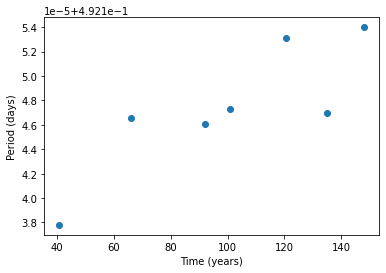

In [231]:
X = []
Y = []
for i in range(len(star['V74'].time)):
    if star['V74'].p[i] and star['V74'].time[i]:
        X.append(star['V74'].time[i])
        Y.append(star['V74'].p[i])
plt.scatter((np.array(X)-2400000)/360,np.array(Y))
plt.xlabel('Time (years)')
plt.ylabel('Period (days)')
plt.show()

In [137]:
import astropy
import scipy.constants as c
def chi(wavelength):
    return (1.98644589e-25)/(1.380649e-23*wavelength)
def eff_temp(a_wavelength,b_wavelength,color_index,n=4):
    a_chi = chi(a_wavelength)
    b_chi = chi(b_wavelength)
    
    gamma = 5 - 9 * (abs(np.log(a_chi/b_chi))+3)**(-0.252)
    
    tau = (b_chi-a_chi)/(np.log((color_index)*(b_chi/a_chi)**(n-1)))
    tau_prime = (b_chi-a_chi)/(np.log((color_index)*(b_chi/a_chi)**(n-gamma)))
    
    return (tau+tau_prime)/2

wavelength_B = 445e-9
wavelength_V = 551e-9
wavelength_R = 658e-9
wavelength_I = 806e-9
BV=0.3
(chi(wavelength_B)-chi(wavelength_V))/2
eff_temp(wavelength_B,wavelength_V,BV,n=5)

2690.154639853845

In [141]:
from PyAstronomy import pyasl

b = pyasl.BallesterosBV_T()
b.bv2T(0.3)

7461.863794100636

In [53]:
import numpy as np
from scipy.optimize import curve_fit
import numba
from multiprocessing import Pool


@numba.njit
def fourier(x,period,params,Nterms):
    '''
    A Fourier function (model) that calculates y-value 
    at each x-value for given period and parametrs.
    ** IMPORTANT NOTE: ```params``` has to be a numpy array (not python list)
    '''
    # if debug:
    #     print('*Fourier: starting Fourier')
    #     print('*Fourier: params = ',params)
    y = np.ones_like(x) * params[0]
    C_list = params[1:Nterms+1]
    phi_list = params[Nterms+1:]
    # if debug:
    #     print('*Fourier: y_initial = ',y)
    #     print('*Fourier: C_list = ',C_list)
    #     print('*Fourier: phi_list = ',phi_list)
    for i in range(Nterms):
        y = y + C_list[i] * np.cos((i+1)*2*np.pi*x/period + phi_list[i])
    # if debug:
    #     print('*Fourier: y after calculation = ',y)
    return y

def fourier_p0(x,y,yerr,period,Nterms,**kwargs):
        return [np.mean(y),*np.zeros(2*Nterms)]

def get_bestfit_Fourier(x,y,yerr,period,Nterms,return_yfit=True,return_params=False,
                        debug=False):
    '''
    ### Fourier Model ###
    returns best-fit y-values at given x
    if return_yfit==True, it returns best-fit y-values at given x
    if return_params==True, it returns best-fit parameters (model-dependent)
    NOTE: Fourier parameters are not bound to keep the code fast.
    For stellar parameter calculation purpose, use tools in StellarModels class.
    '''
    if debug:
        print('*get_bestfit_Fourier: starting process get_bestfit_Fourier(): ')
        print('*get_bestfit_Fourier: x = ',x)
        print('*get_bestfit_Fourier: y = ',y)
        print('*get_bestfit_Fourier: yerr = ',yerr)
    par0 = [np.mean(y),*np.zeros(2*Nterms)]
    if debug:
        print('*get_bestfit_Fourier: par0 = ',par0)

    popt,pcov = curve_fit(
        lambda x,*params:fourier(x,period,np.array(params),Nterms),x,y,sigma=yerr,p0=par0,maxfev=100000)
    if debug:
        print('*get_bestfit_Fourier: optimization finished')
        print('*get_bestfit_Fourier: popt = ',popt)
        print('*get_bestfit_Fourier: pcov = ',pcov)
    if return_yfit:
        y_fit = fourier(x,period,Nterms,popt)
        if debug:
            print('*get_bestfit_Fourier: y_fit = ',y_fit)
        if not return_params:
            return y_fit
        if return_params:
            return y_fit,popt
    elif return_params:
        return popt

0.5144906051599916


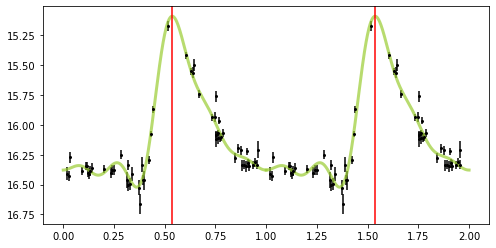

In [84]:
import PIPS
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

path = './M3_Data/M3_v6.dat'

data = PIPS.data_readin_LPP(path,filter='B')
star = PIPS.photdata(data)
star.get_period(p_min=0.1,p_max=1,multiprocessing=False)
print(star.period)
# phase-folded plot
star.plot_lc() # plots (x%period, y) scatter: normalized to phase
x_th,y_th = star.get_bestfit_curve()
epoch_offset = star.get_epoch_offset() # the epoch offset in the unit of [days] (not normalized to phase)

# plot
plt.plot(x_th/star.period,y_th,c='yellowgreen',lw=3,alpha=0.7)
plt.plot(x_th/star.period+1,y_th,c='yellowgreen',lw=3,alpha=0.7)
plt.axvline(epoch_offset/star.period,color='red')
plt.axvline(epoch_offset/star.period+1,color='red')

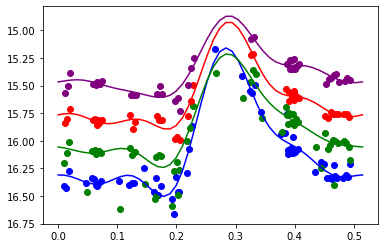

In [148]:
line_color = {}
line_color['B'] = 'blue'
line_color['V'] = 'green'
line_color['R'] = 'red'
line_color['I'] = 'purple'
x_th = {}
y_th = {}
y = {}

for color in ['B','V','R','I']:
    data = PIPS.data_readin_LPP(path,filter=color)
    x,y[color],yerr = data
    x_folded = x%star.period
    plt.scatter(x_folded,y[color],c=line_color[color])
    Nterms = 4
    fparams = get_bestfit_Fourier(x_folded,y[color],yerr,star.period,Nterms,return_yfit=False,return_params=True)
    x_th[color] = np.linspace(0,star.period)
    y_th[color] = fourier(x_th[color],star.period,fparams,Nterms)
    plt.plot(x_th[color],y_th[color],c=line_color[color])
plt.ylim(plt.ylim()[1],plt.ylim()[0])
plt.show()

3.9159823792990753
3.923251770424487


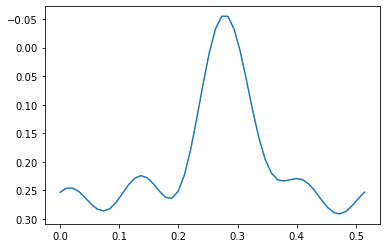

In [159]:
bv = y_th['B']-y_th['V']
T = np.mean(b.bv2T(bv))
plt.plot(x_th['V'],bv)
plt.ylim(plt.ylim()[1],plt.ylim()[0])
print(np.log10(T))
bv = np.mean(y['B'])-np.mean(y['V'])
T = np.mean(b.bv2T(bv))
print(np.log10(T))

In [160]:
model = PIPS.Cacciari2005(star)
model.calc_Fe_H_ab()
model.calc_error_Fe_H_ab()
model.calc_BV_0_ab()
model.calc_error_BV_0_ab()
model.calc_log_T_eff_type_ab()
model.calc_error_log_T_eff_type_ab()
print(model.log_T_eff)
print(model.log_T_eff_err)

3.814096720489997
0.0031939792649210924
